### Importing Libraries and Loading the Dataset

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the dataset
data = pd.read_csv(r"C:\Users\hp\Desktop\german_credit_data.csv")

In [7]:
# Initial sight of data
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [8]:
# Check the missing values and data type
data.drop(data.columns[0], inplace=True, axis=1)
print('The dataset has {} observations (customers) and {} columns (attributes).'.format(data.shape[0], data.shape[1]))
print('Missing values in each column:\n{}'.format(data.isnull().sum()))
print('Columns data types:\n{}'.format(data.dtypes))

The dataset has 1000 observations (customers) and 9 columns (attributes).
Missing values in each column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Columns data types:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [9]:
# Unique values
n_unique = data.nunique()
print('Number of unique values:\n{}'.format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [10]:
print('Unique values in each categorical column:')
for col in data.select_dtypes(include=[object]):
    print(col,":",data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


### Exploratory Data Analysis

In [14]:
def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

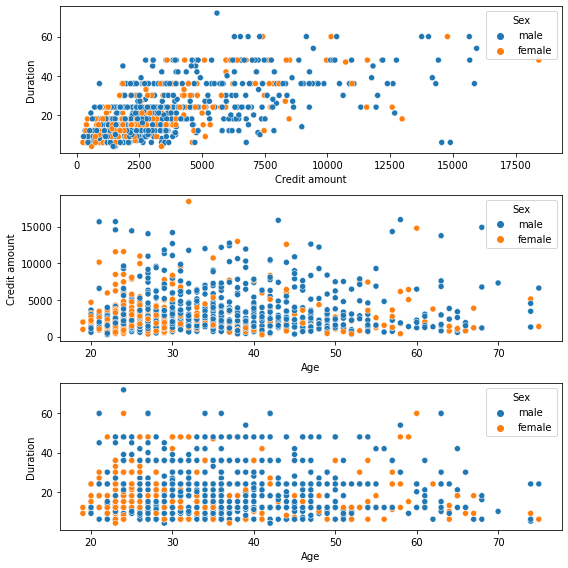

In [15]:
scatters(data, h='Sex')

**Takeaway**: The general impression is that women tend to be younger than men, however, the top plot shows that there is no clear difference between men and women in terms of amount and duration of the credit. From visual inspection, it seems that there is some positive correlation between duration and amount of credit, which makes sense.

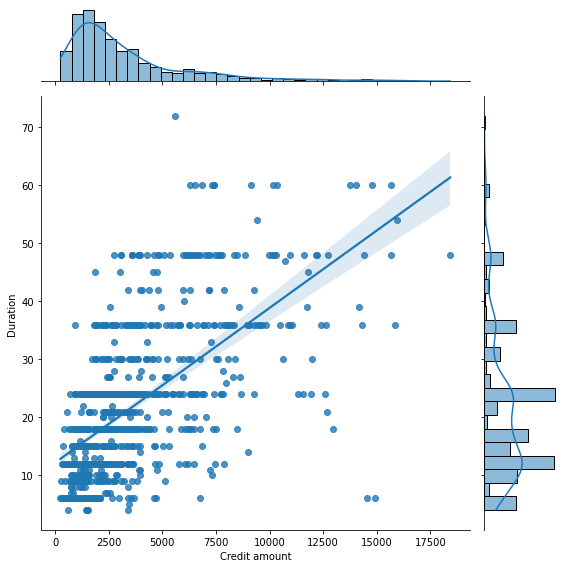

In [76]:
# Check Linear Correlation: Credit Amount vs Duration
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="reg", height=8)
#r1.annotate(stats.pearsonr)
plt.show()

**Takeaway**: The plot above shows a Pearson correlation (linear corr.) with a value of 0.62 and a very small p-value. This means: The Duration and Credit Amount has a linear strong positive correlation. When the Credit Amount increases, the Duration increases simultaneosly. That makes sense because usually, people take bigger credits for longer periods.

Below we will analyse Linear Regression with various categorisations.

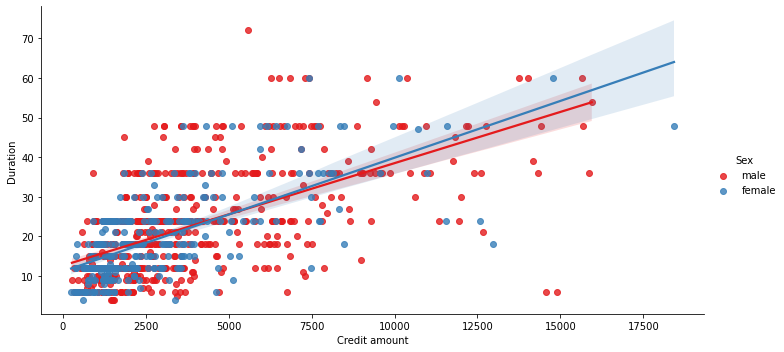

In [24]:
# Linear Regession plot; categorized by Sex
sns.lmplot(x='Credit amount', y='Duration',hue='Sex', data=data, palette='Set1', aspect=2)
plt.show()

**Takeaway**: The plot indicates that there is no significant difference between men and women.

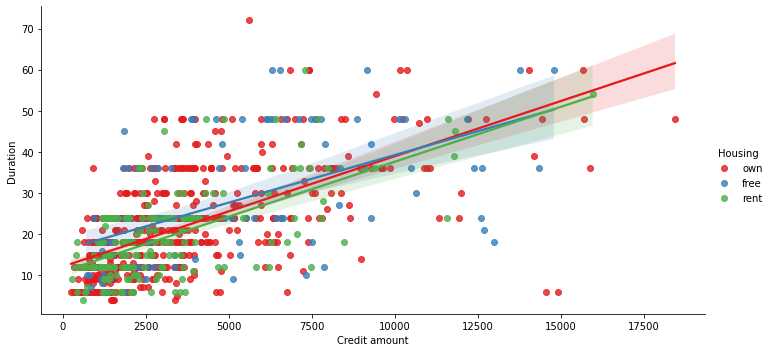

In [27]:
# Linear Regession plot; categorized by Housing
sns.lmplot(x='Credit amount', y='Duration', hue='Housing', data=data, palette='Set1', aspect=2)
plt.show()

**Takeaway**: The plot shows similarly that there is no difference between housing categories.

Below we will show the "business" area where is granted the biggest amount of credits.

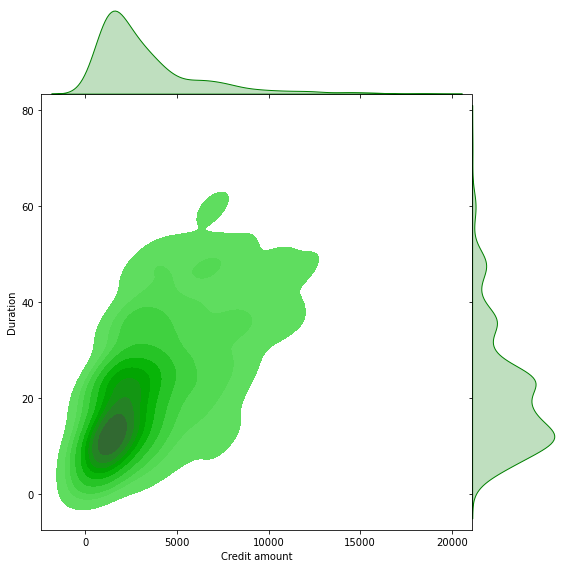

In [30]:
sns.jointplot("Credit amount","Duration", data=data, kind="kde", space=0, color="g",  height=8, fill=True)
plt.show()

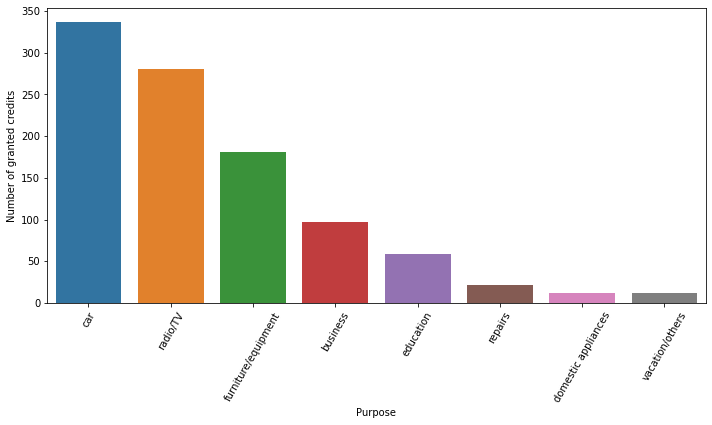

In [31]:
n_credits = data.groupby('Purpose')['Age'].count().rename('Count').reset_index()
n_credits.sort_values(by=['Count'], ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
bar = sns.barplot(x='Purpose', y='Count', data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel('Number of granted credits')
plt.tight_layout()

**Takeaway**: The barplot above shows how many credits were granted for various purposes. Most of credits were granted for car and radio/TV.

In [35]:
# Boxplot
def boxes(x, y, h, r=45):
    fig, ax = plt.subplots(figsize=(10, 6))
    box = sns.boxplot(x=x, y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

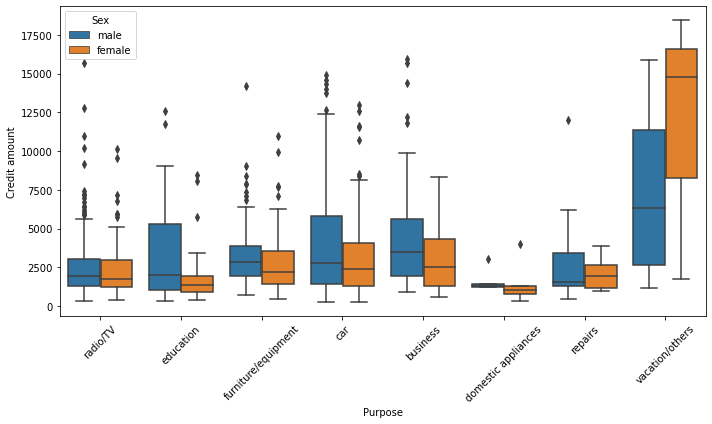

In [36]:
# Boxplot: Purpose vs Credit Amount; categorized: Sex
boxes('Purpose', 'Credit amount', 'Sex')

**Takeaway**: The plot above shows that the biggest amounts are taken for `vacations/others`. In the other hand, the smallest amounts are for `domestic appliances`. Most of the categories have outliers on the upper side (higher amounts). In most of the cases, there is no difference between men and women, despite the category `vacations/others`. We noted before that there was a very small number of credits granted for this category.

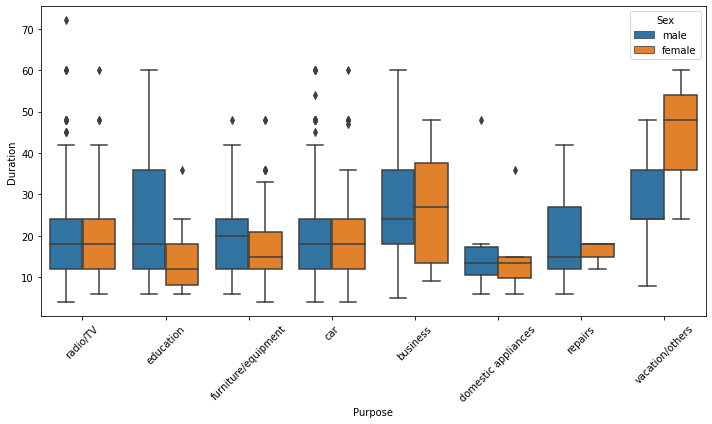

In [37]:
# Boxplot: Purpose vs Duration; categorized: Sex
boxes('Purpose', 'Duration', 'Sex')

**Takeaway**: The boxplot indicates that generally there is no difference in credit duration between men and women. We can distinct an imbalance between man and women for the `education` category. The male category has clearly longer periods of credits for the `education`.

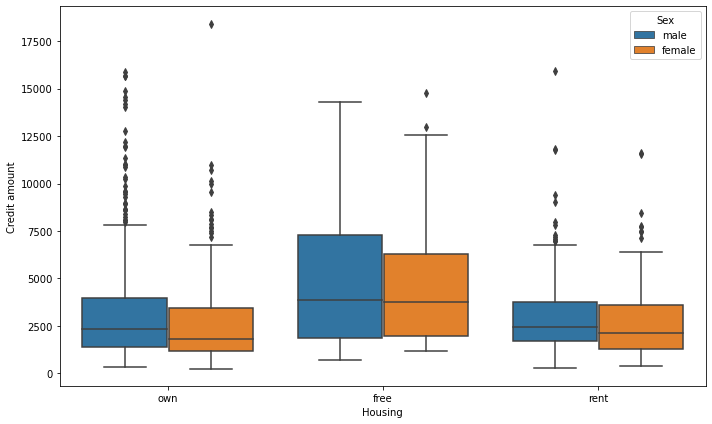

In [38]:
# Boxplot: Credit Amount vs Housing; categorized: Sex
boxes('Housing', 'Credit amount', 'Sex', r=0)

**Takeaway**: In terms of housing category, there is no big difference despite people having 'free' housing tend to take slightly bigger credit amounts.

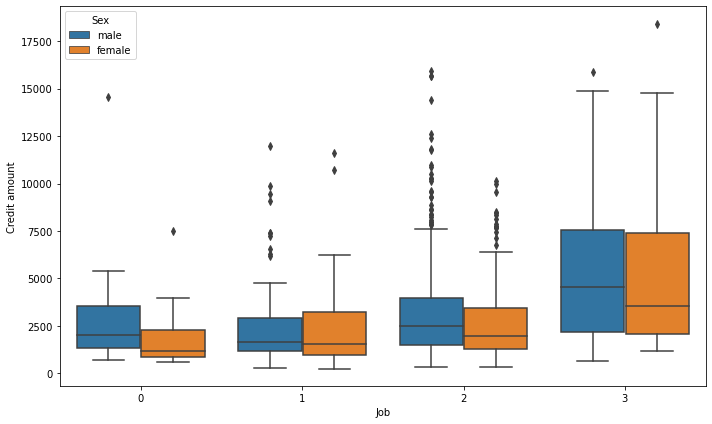

In [39]:
# Boxplot: Credit Amount vs Job; categorized: Sex
boxes('Job', 'Credit amount', 'Sex', r=0)

**Takeaway**: Based on the boxplot, we conclude that people with 3 jobs, tend to take bigger amounts of credit, which makes sense.

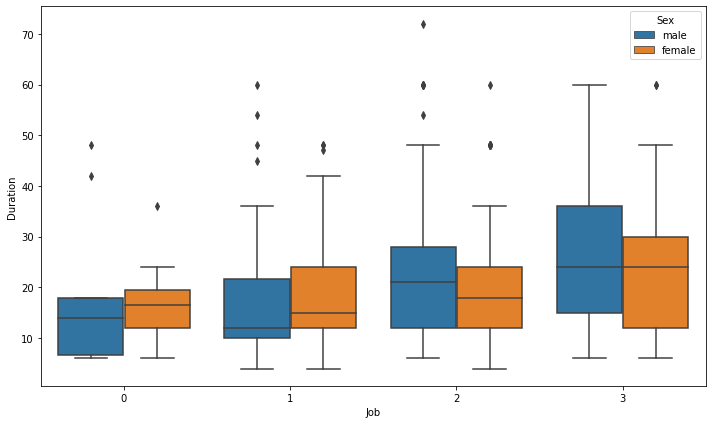

In [40]:
# Boxplot: Duration vs Job; categorized: Sex
boxes('Job', 'Duration', 'Sex', r=0)

**Takeaway**: In terms of job category, once again there is no difference between men and women, but we can see that individuals with 3 jobs take credits for longer duration.

Text(0.5, 0, 'Age')

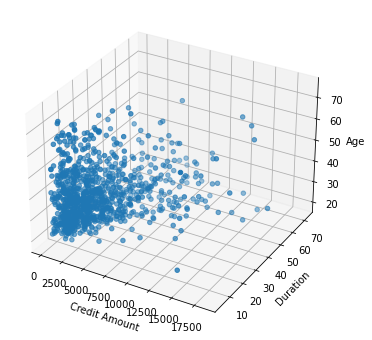

In [41]:
# 3D plot: Credit Amount, Duration, Age
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Credit amount'], data['Duration'], data['Age'])
ax.set_xlabel('Credit Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

### Clustering

For clustering, we will create a subset containing only numerical variables (Age, Credit, Amount, Duration).

In [42]:
# Selecting columns for clusterization with k-means
selected_cols = ['Age', 'Credit amount', 'Duration']
cluster_data = data.loc[:, selected_cols]

In [51]:
# Plotting histograms
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    ax1.set_title('Age')
    sns.distplot(df["Credit amount"], ax=ax2)
    ax2.set_title('Credit Amount')
    sns.distplot(df["Duration"], ax=ax3)
    ax3.set_title('Duration')
    plt.tight_layout()

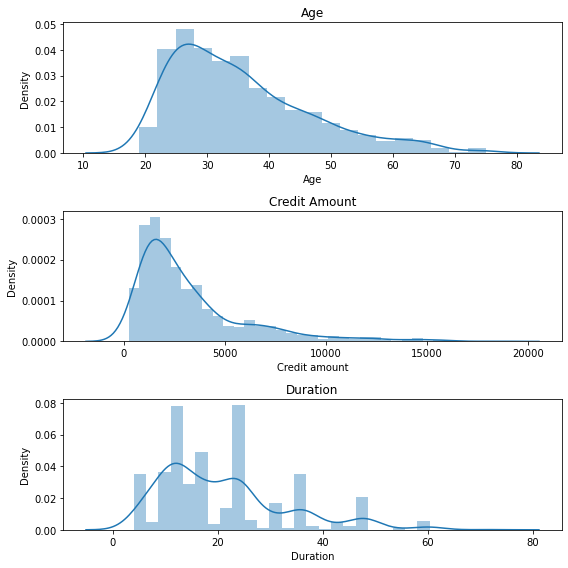

In [52]:
distributions(cluster_data)

**Takeaway**: We can see that distributions are postively-skewed. To obtain better results we should remove the skewness by logarithmic transformation.

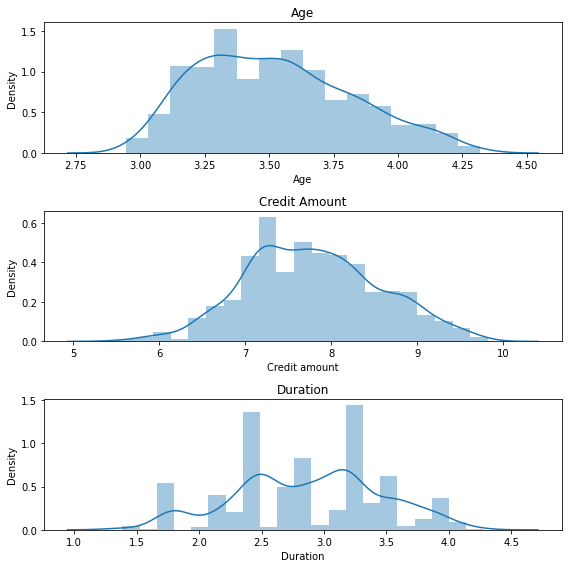

In [54]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

**Takeaway**: Indeed, the skewness has been eliminated.

**Note**: The next step will be centering and scaling of variables. It is a very important step for K-Means algorithm.

In [55]:
# Standardization
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

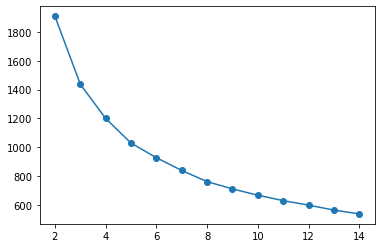

In [56]:
# Check the inertia changes for various number of clusters

clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias = []

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)
plt.figure()
plt.plot(clusters_range, inertias, marker='o')

**Takeaway**: The plot above shows that inertia decreases when increasing number of clusters.
This method allows the assessment of cluster separations and fitting of each observation in its own cluster. The highest score the better the result. We will perform this analysis for various seeds as well.

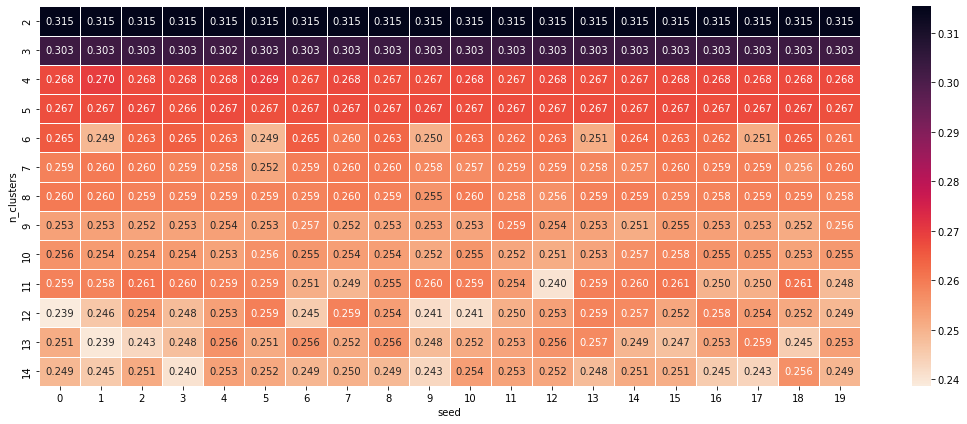

In [59]:
# Silhouette Score to calculate the goodness of a clustering technique
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2, 15)
random_range = range(0, 20)
results = []
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print('For n_clusters =', c, 'and seed=', r, '\nThe average silhouette_score is: ', silhouette_avg)
        results.append([c, r, silhouette_avg])
results = pd.DataFrame(results, columns=['n_clusters', 'seed', 'silhouette_score'])
pivot_km = pd.pivot_table(results, index='n_clusters', columns='seed', values='silhouette_score')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidth=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

**Takeaway**: The heatmap above shows silhouette scores for various combinations of random state and number of clusters. The highest scores are 2 and 3 clusters. These clusters are relatively insensitive to seed.

We will use 3 clusters to get more insight into data.

In [60]:
# 3 clusters initialization
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30255813750380023


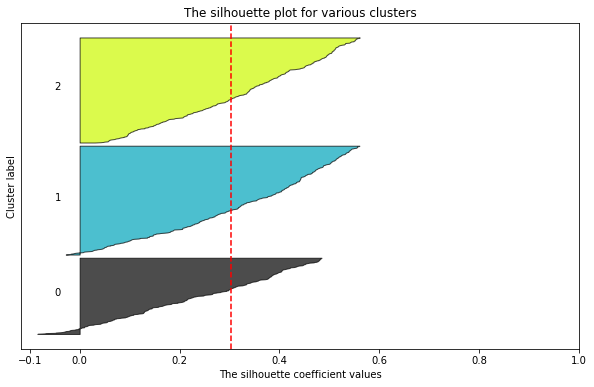

In [63]:
# Create silhouette graph for 3 clusters
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

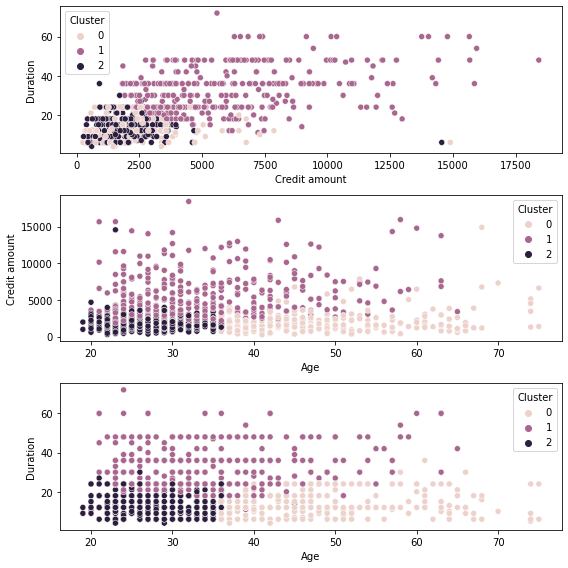

In [64]:
# Plotting the clusters
scatters(clustered_data, 'Cluster')

**Takeaway**: Plots above show three created clusters. Two bottom ones show relatively clear separation of clusters, but it is no so evident on the top one.

We will generate a heatmap for easier interpretation of customer segmentation.

In [65]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,48.5,1970.3,13.9
1,34.0,5665.4,32.2
2,27.7,1736.3,14.3


- Cluster 0 - lower average of credit amount, short duration, older customers
- Cluster 1 - high average of credit amount, long duration, middle-aged customers
- Cluster 2 - lower average of credit amount, short duration, young customers

### Clustering with Affinity Propagation

**Note**: In this algorithm there are two relevant parameters: preference and damping. It means that we don't define upfront number of clusters, algorithm itself chooses the number. We will fix damping and check number of clusters in function of preference parameter.

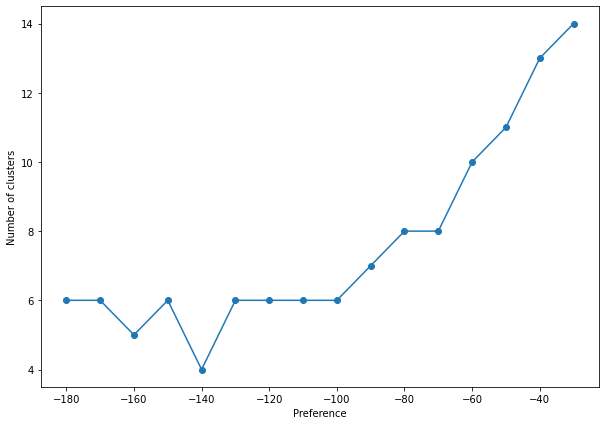

In [66]:
preferences = np.arange(-30, -190, -10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))
plt.figure(figsize=(10, 7))
plt.xlabel('Preference')
plt.ylabel('Number of clusters')
plt.plot(preferences, clusters, marker='o')

**Takeaway**: The plot shows that decreasing value of preference causes decreasing number of clusters simlutaneously. We will check the option with 4 clusters.

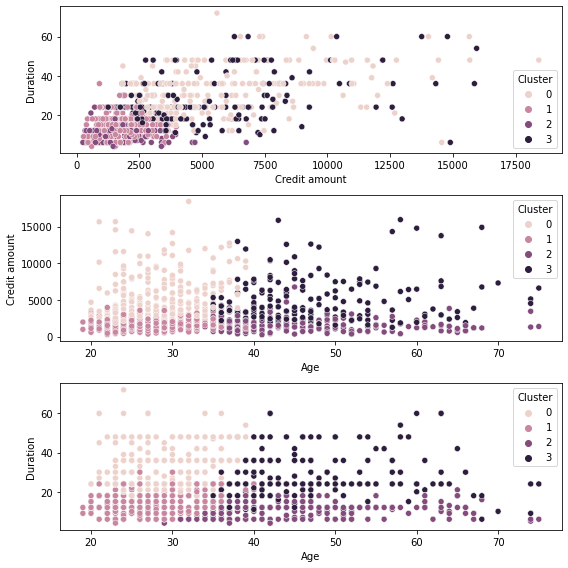

In [69]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters(clustered_data_af, 'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)

In [70]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

,Age,Credit amount,Duration
Cluster,,,
0,28.7,5593.7,32.2
1,27.9,1654.3,15.1
2,46.0,1551.7,10.7
3,47.5,4977.9,27.6


- Cluster 0 - high average of credit amount, long duration, younger customers
- Cluster 1 - low average of credit amount, short duration, younger customers
- Cluster 2 - low average of credit amount, short duration, older customers
- Cluster 3 - high average of credit amount, middle-time duration, older customers